#Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('/content/drive/MyDrive/colab Notebooks/Datasets/Datasets/FakeNews.csv')

In [17]:
# Show first five rows of the dataset
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
df.shape

(20800, 5)

In [19]:
# get how many null values are present in specific column
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [21]:
# drop nan values
df.dropna(inplace=True)

In [22]:
# get number of columns and rows
df.shape

(18285, 5)

In [23]:
# to get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [24]:
# get the independent features
X=df.drop('label',axis=1)

In [25]:
# get the dependent features
y=df['label']

In [26]:
X.shape

(18285, 4)

In [27]:
y.shape

(18285,)

In [28]:
import tensorflow as tf


In [29]:
# to know the version of tensorflow library
tf.__version__

'2.7.0'

In [31]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [32]:
# vocubulary size
voc_size=5000

##Onehot Representation

In [33]:
# to get copy of X dataset
messages=X.copy()

In [34]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [35]:
# to reset the index of messages
messages.reset_index(inplace=True)

In [36]:
import nltk
import re
from nltk.corpus import stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [40]:
onehot_repre=[one_hot(words,voc_size)for words in corpus]
onehot_repre

[[3131, 4426, 2995, 2968, 4496, 4768, 2254, 3692, 4125, 1043],
 [3895, 2908, 2856, 2277, 450, 402, 3981],
 [4276, 2933, 3100, 633],
 [573, 4888, 550, 1079, 3611, 4202],
 [212, 450, 3289, 1631, 2790, 3683, 450, 4673, 853, 4523],
 [348,
  2006,
  102,
  2802,
  1802,
  1694,
  2766,
  4081,
  2634,
  4207,
  1098,
  2051,
  696,
  4771,
  3981],
 [4637, 172, 725, 2152, 4650, 4830, 2440, 3585, 1657, 653, 3900],
 [477, 1852, 3242, 543, 2719, 2009, 1694, 4100, 1657, 653, 3900],
 [3324, 2688, 1643, 4778, 3869, 2890, 2573, 816, 1694, 4857],
 [82, 4314, 294, 2295, 3433, 435, 4559, 2181],
 [3809, 1481, 602, 1216, 3373, 184, 1169, 187, 4922, 4678, 2849],
 [1079, 1848, 4496, 2890, 1694, 2719],
 [648, 4706, 4444, 3032, 3983, 2204, 3122, 736, 4525],
 [2081, 2551, 3855, 746, 2280, 3351, 4608, 1657, 653, 3900],
 [2734, 1832, 1302, 4636, 4673, 1657, 653, 3900],
 [89, 1163, 4043, 2146, 1979, 3726, 1942, 2818, 490, 3858],
 [1413, 890, 2908],
 [3071, 2787, 4574, 4857, 1694, 1271, 1173, 3981],
 [4611, 425

## Embedding Representation

In [41]:
sent_length=20
embedded_docs=pad_sequences(onehot_repre,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3692 4125 1043]
 [   0    0    0 ...  450  402 3981]
 [   0    0    0 ... 2933 3100  633]
 ...
 [   0    0    0 ... 1657  653 3900]
 [   0    0    0 ... 2131 2998 2879]
 [   0    0    0 ... 3891 2773  304]]


In [42]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3131,
       4426, 2995, 2968, 4496, 4768, 2254, 3692, 4125, 1043], dtype=int32)

In [43]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
len(embedded_docs),y.shape

(18285, (18285,))

In [45]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [46]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

## Model Training

In [48]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 11s 12ms/step - loss: 0.3410 - accuracy: 0.8405 - val_loss: 0.1898 - val_accuracy: 0.9175
Epoch 2/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1399 - accuracy: 0.9437 - val_loss: 0.1873 - val_accuracy: 0.9205
Epoch 3/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0926 - accuracy: 0.9677 - val_loss: 0.2009 - val_accuracy: 0.9234
Epoch 4/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0591 - accuracy: 0.9795 - val_loss: 0.2720 - val_accuracy: 0.9147
Epoch 5/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.2817 - val_accuracy: 0.9190
Epoch 6/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.4142 - val_accuracy: 0.9105
Epoch 7/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.4522 - val_accuracy: 0.9037
Epoc

## Adding Dropout

In [ ]:
## For hyperparameter tuning i can add dropout layer in previous model
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Performance Metrics And Accuracy

In [50]:
y_pred=model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [55]:
cf=confusion_matrix(y_test,y_pred.round())

In [56]:
import seaborn as sns

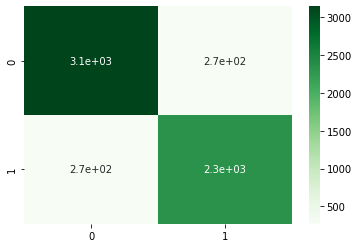

In [58]:
sns.heatmap(data=cf,cmap='Greens',annot=True)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred.round())

0.9101905550952776